<h1><b><Center>Exam<br><hr>

<h3><b><Center>
Name        :       Mustafa<br>
Roll-No     :       22P-9221<br>
Section     :       BCS-6C<br><hr>

<h1><b><Center>Question 1: KMEANS

In [1]:
import pandas as pd 

In [206]:
dataset = pd.DataFrame({
    "City": ["New York","Toronto","London","Paris","Berlin","Sydney"],
    "Latitude": [40.71,43.65,51.50,48.86,52.25,-33.87],
    "Longitude": [-74.01,-79.38,-0.13,2.35,13.41,151.21]
})
dataset

,City,Latitude,Longitude
0,New York,40.71,-74.01
1,Toronto,43.65,-79.38
2,London,51.50,-0.13
3,Paris,48.86,2.35
4,Berlin,52.25,13.41
5,Sydney,-33.87,151.21


In [207]:
data = dataset.copy()

In [208]:
x = data[["Latitude",'Longitude']]
x

,Latitude,Longitude
0,40.71,-74.01
1,43.65,-79.38
2,51.50,-0.13
3,48.86,2.35
4,52.25,13.41
5,-33.87,151.21


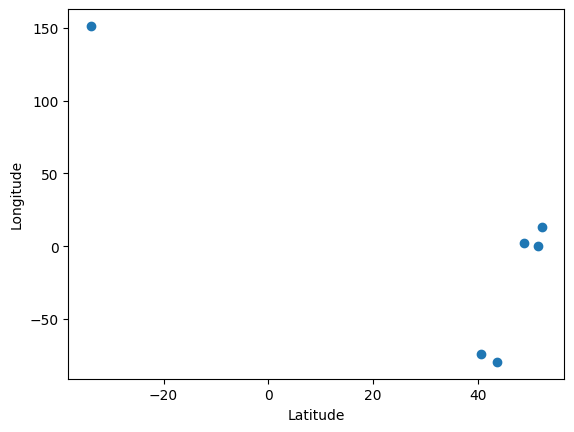

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x["Latitude"],x["Longitude"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [210]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=3,random_state=0)

In [211]:
k.fit(x)

KMeans(n_clusters=3, random_state=0)

In [215]:
y_pred = k.predict(x)
y_pred

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [216]:
data["Cluster"]=y_pred
data

,City,Latitude,Longitude,Cluster
0,New York,40.71,-74.01,2
1,Toronto,43.65,-79.38,2
2,London,51.50,-0.13,0
3,Paris,48.86,2.35,0
4,Berlin,52.25,13.41,0
5,Sydney,-33.87,151.21,1


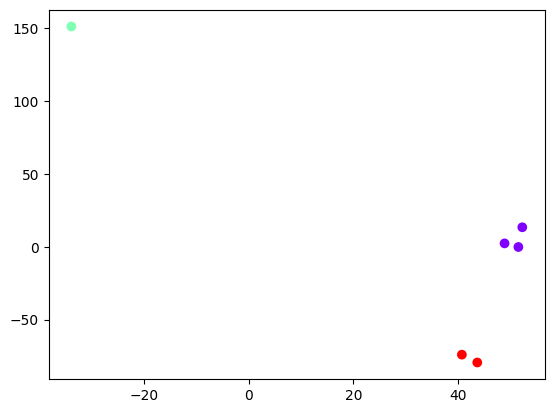

In [23]:
plt.scatter(x["Latitude"],x["Longitude"],cmap="rainbow",c=y_pred)

In [217]:
sse=[]
for i in range(1,6):
    k = KMeans(i)
    k.fit_predict(x)
    sse.append(k.inertia_)
sse

[40402.826283333336,
 8269.751,
 129.01684999999998,
 25.30024999999994,
 6.560000000000002]

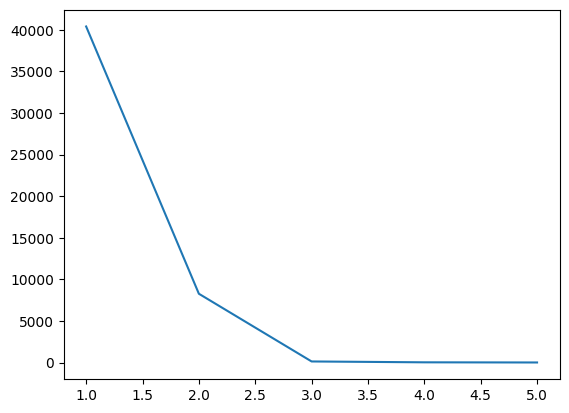

In [26]:
plt.plot(range(1,6),sse)

<h3><b>As you can see from the graph the elbow point as it 3 its not changing further which shows the optimal value for k

In [42]:
new_k = KMeans(n_clusters=3,max_iter=300,n_init=10)

In [43]:
new_k.fit(x)

KMeans(n_clusters=3, n_init=10)

In [218]:
new_y_pred = new_k.predict(x)
new_y_pred

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [219]:
new_data = dataset.copy()
new_data

,City,Latitude,Longitude
0,New York,40.71,-74.01
1,Toronto,43.65,-79.38
2,London,51.50,-0.13
3,Paris,48.86,2.35
4,Berlin,52.25,13.41
5,Sydney,-33.87,151.21


In [220]:
new_data["Clustor"]=new_y_pred
new_data

,City,Latitude,Longitude,Clustor
0,New York,40.71,-74.01,2
1,Toronto,43.65,-79.38,2
2,London,51.50,-0.13,0
3,Paris,48.86,2.35,0
4,Berlin,52.25,13.41,0
5,Sydney,-33.87,151.21,1


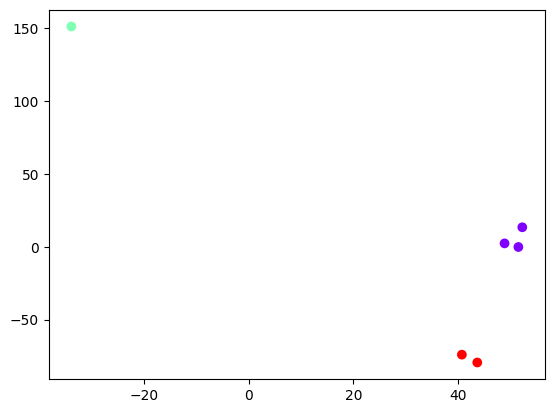

In [50]:
plt.scatter(new_data["Latitude"],new_data["Longitude"],c=new_data["Clustor"],cmap="rainbow")

<hr>

<h1><b><Center>Question 2 : Single-layer-Perceptron

In [221]:
import pandas as pd

In [222]:
data = pd.DataFrame({
    "Temperature (normalized)": [0.0,0.0,1.0,1.0],
    "Cough Severity (normalized)": [0.0,1.0,0.0,1.0],
    "Label (Flu: 0=N0, 2=Yes)": [0,1,1,1]
})

In [223]:
data

,Temperature (normalized),Cough Severity (normalized),"Label (Flu: 0=N0, 2=Yes)"
0,0.0,0.0,0
1,0.0,1.0,1
2,1.0,0.0,1
3,1.0,1.0,1


In [225]:
x=data[["Temperature (normalized)","Cough Severity (normalized)"]]
y = data ["Label (Flu: 0=N0, 2=Yes)"]
x

,Temperature (normalized),Cough Severity (normalized)
0,0.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,1.0


In [227]:
from keras.models import Sequential
from keras.layers import Dense

In [228]:
p = Sequential()
p.add(Dense(1,input_dim=2,activation="sigmoid"))
p.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

/home/mustafa/jupyter-venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [229]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_test

,Temperature (normalized),Cough Severity (normalized)
1,0.0,1.0
3,1.0,1.0


In [230]:
p.fit(x_train,y_train,epochs=10,verbose="Monitor-Progress")

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [244]:
loss,accuray = p.evaluate(x_train,y_train)
print("accuray : ",accuray)
print("loss : ",loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.2180
accuray :  1.0
loss :  0.21798619627952576


In [251]:
pred = p.predict(x_test)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.33077934],
       [0.39455003]], dtype=float32)

In [253]:
import numpy as np
y_pred=[]
for i in pred:
    y_pred.append([1] if i[0]>=0.5 else [0])
y_pred=np.array(y_pred)
for i in y_pred:
    print(i) # round to 0 and 1 saved in np.array

[0]
[0]


In [254]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.0

<h3><b>The Accuracy is Zero because y_actual does not match y_predict as you can see in the output cells

<h1><b><Center><hr><br>THE END